In [27]:
import pandas as pd
import numpy as np

df = pd.read_csv('Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [15]:
df.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


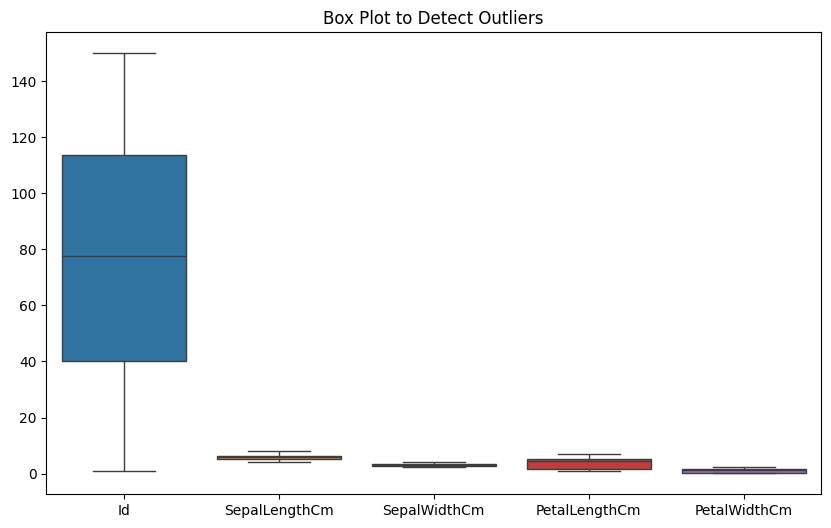

In [16]:
num_cols = df.select_dtypes(include=np.number).columns
num_cols

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

In [17]:
for col in num_cols:
    df = df[df[col] != "?"]

In [18]:
df.shape

(150, 6)

<Axes: ylabel='SepalLengthCm'>

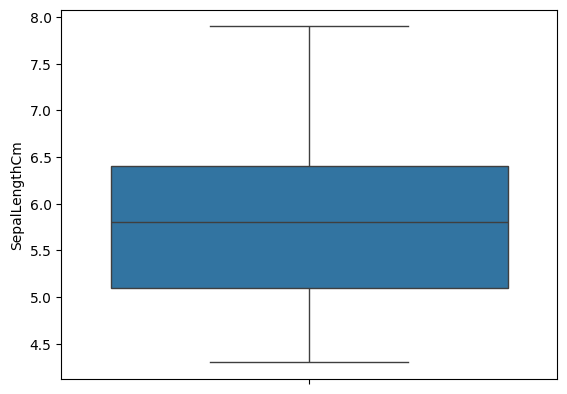

In [28]:
import seaborn as sns


sns.boxplot(data=df["SepalLengthCm"])



<Axes: ylabel='SepalWidthCm'>

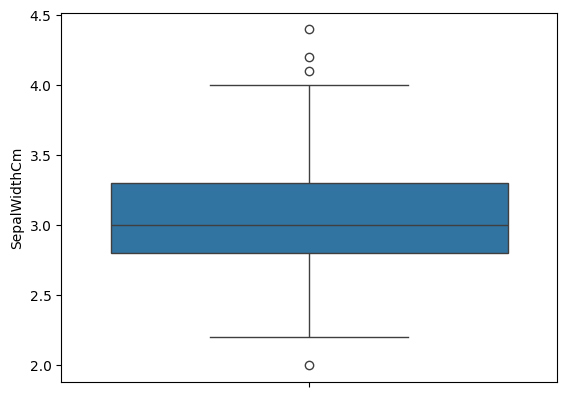

In [29]:
sns.boxplot(data=df["SepalWidthCm"])

<Axes: ylabel='PetalLengthCm'>

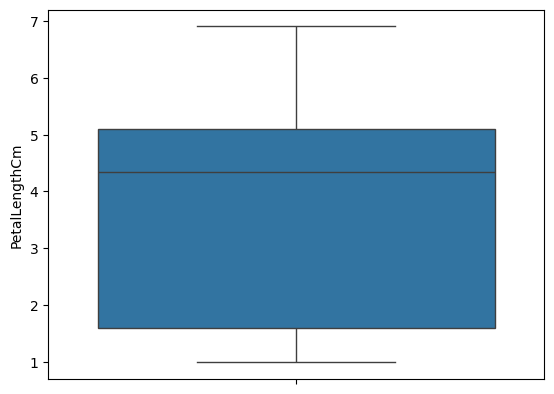

In [30]:
sns.boxplot(data=df["PetalLengthCm"])

<Axes: ylabel='PetalWidthCm'>

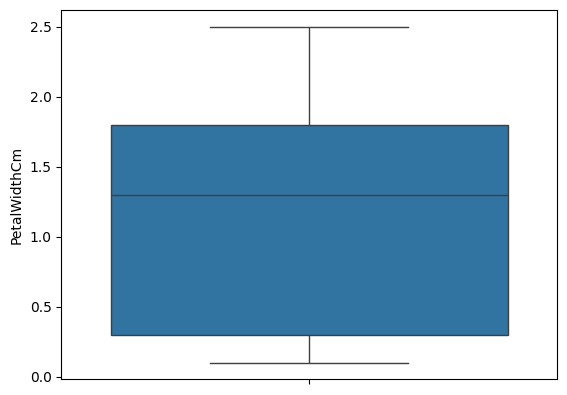

In [31]:
sns.boxplot(data=df["PetalWidthCm"])


In [32]:
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)

IQR = Q3-Q1
lower = Q1-1.5*IQR
upper = Q3+1.5*IQR

for col in num_cols:
  df = df[(df[col] >= lower[col]) & (df[col] <= upper[col])]

In [33]:
df.shape

(146, 6)

<Axes: ylabel='SepalWidthCm'>

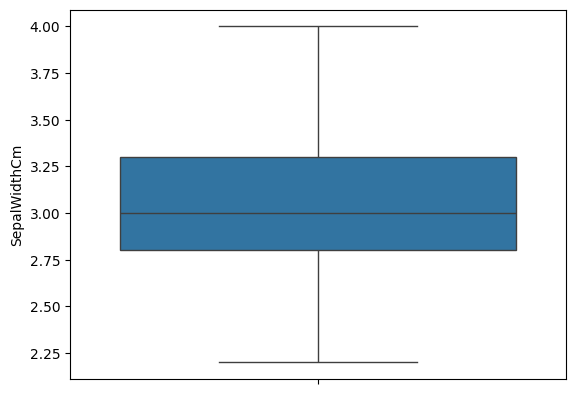

In [34]:
sns.boxplot(data=df["SepalWidthCm"])

In [36]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df["Species"] = le.fit_transform(df["Species"])

print(df)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0      1            5.1           3.5            1.4           0.2        0
1      2            4.9           3.0            1.4           0.2        0
2      3            4.7           3.2            1.3           0.2        0
3      4            4.6           3.1            1.5           0.2        0
4      5            5.0           3.6            1.4           0.2        0
..   ...            ...           ...            ...           ...      ...
145  146            6.7           3.0            5.2           2.3        2
146  147            6.3           2.5            5.0           1.9        2
147  148            6.5           3.0            5.2           2.0        2
148  149            6.2           3.4            5.4           2.3        2
149  150            5.9           3.0            5.1           1.8        2

[146 rows x 6 columns]


In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB

X = df.drop(["Species","Id"], axis=1)
y = df["Species"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)



In [44]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9459459459459459


In [46]:
nb = GaussianNB()

nb.fit(X_train, y_train)
y_pred1 = nb.predict(X_test)
print(accuracy_score(y_pred1, y_test))

0.9459459459459459
